In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sklearn.datasets
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
breast_cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
print(breast_cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
breast_cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
breast_cancer_dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
# changing to 0 = benign; 1 = malignant for intuitiveness
target = breast_cancer_dataset['target']
target = np.where(target == 0, 1, 0)
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [8]:
# creating a dataframe
df = pd.DataFrame(data= breast_cancer_dataset['data'],columns=breast_cancer_dataset['feature_names'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
# setting target column
df['target'] = target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [10]:
print(df['target'].value_counts())
df['target'].value_counts(normalize= True)

target
0    357
1    212
Name: count, dtype: int64


target
0    0.627417
1    0.372583
Name: proportion, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [13]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [14]:
df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


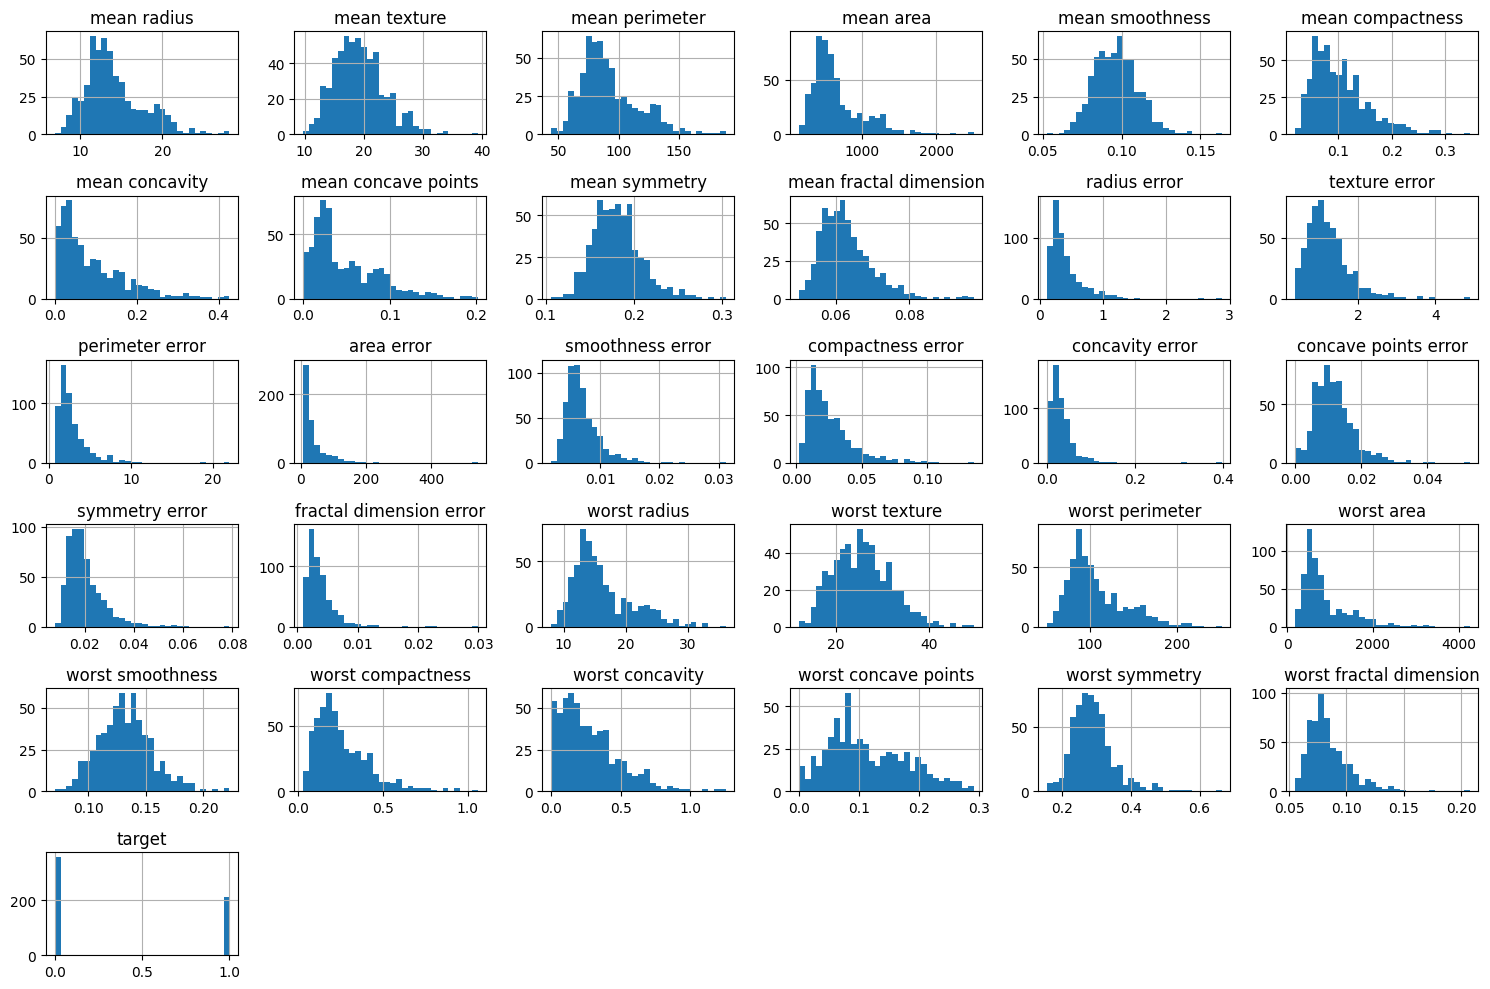

In [15]:
# visualizing feature distribution
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

In [16]:
# checking correlation
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


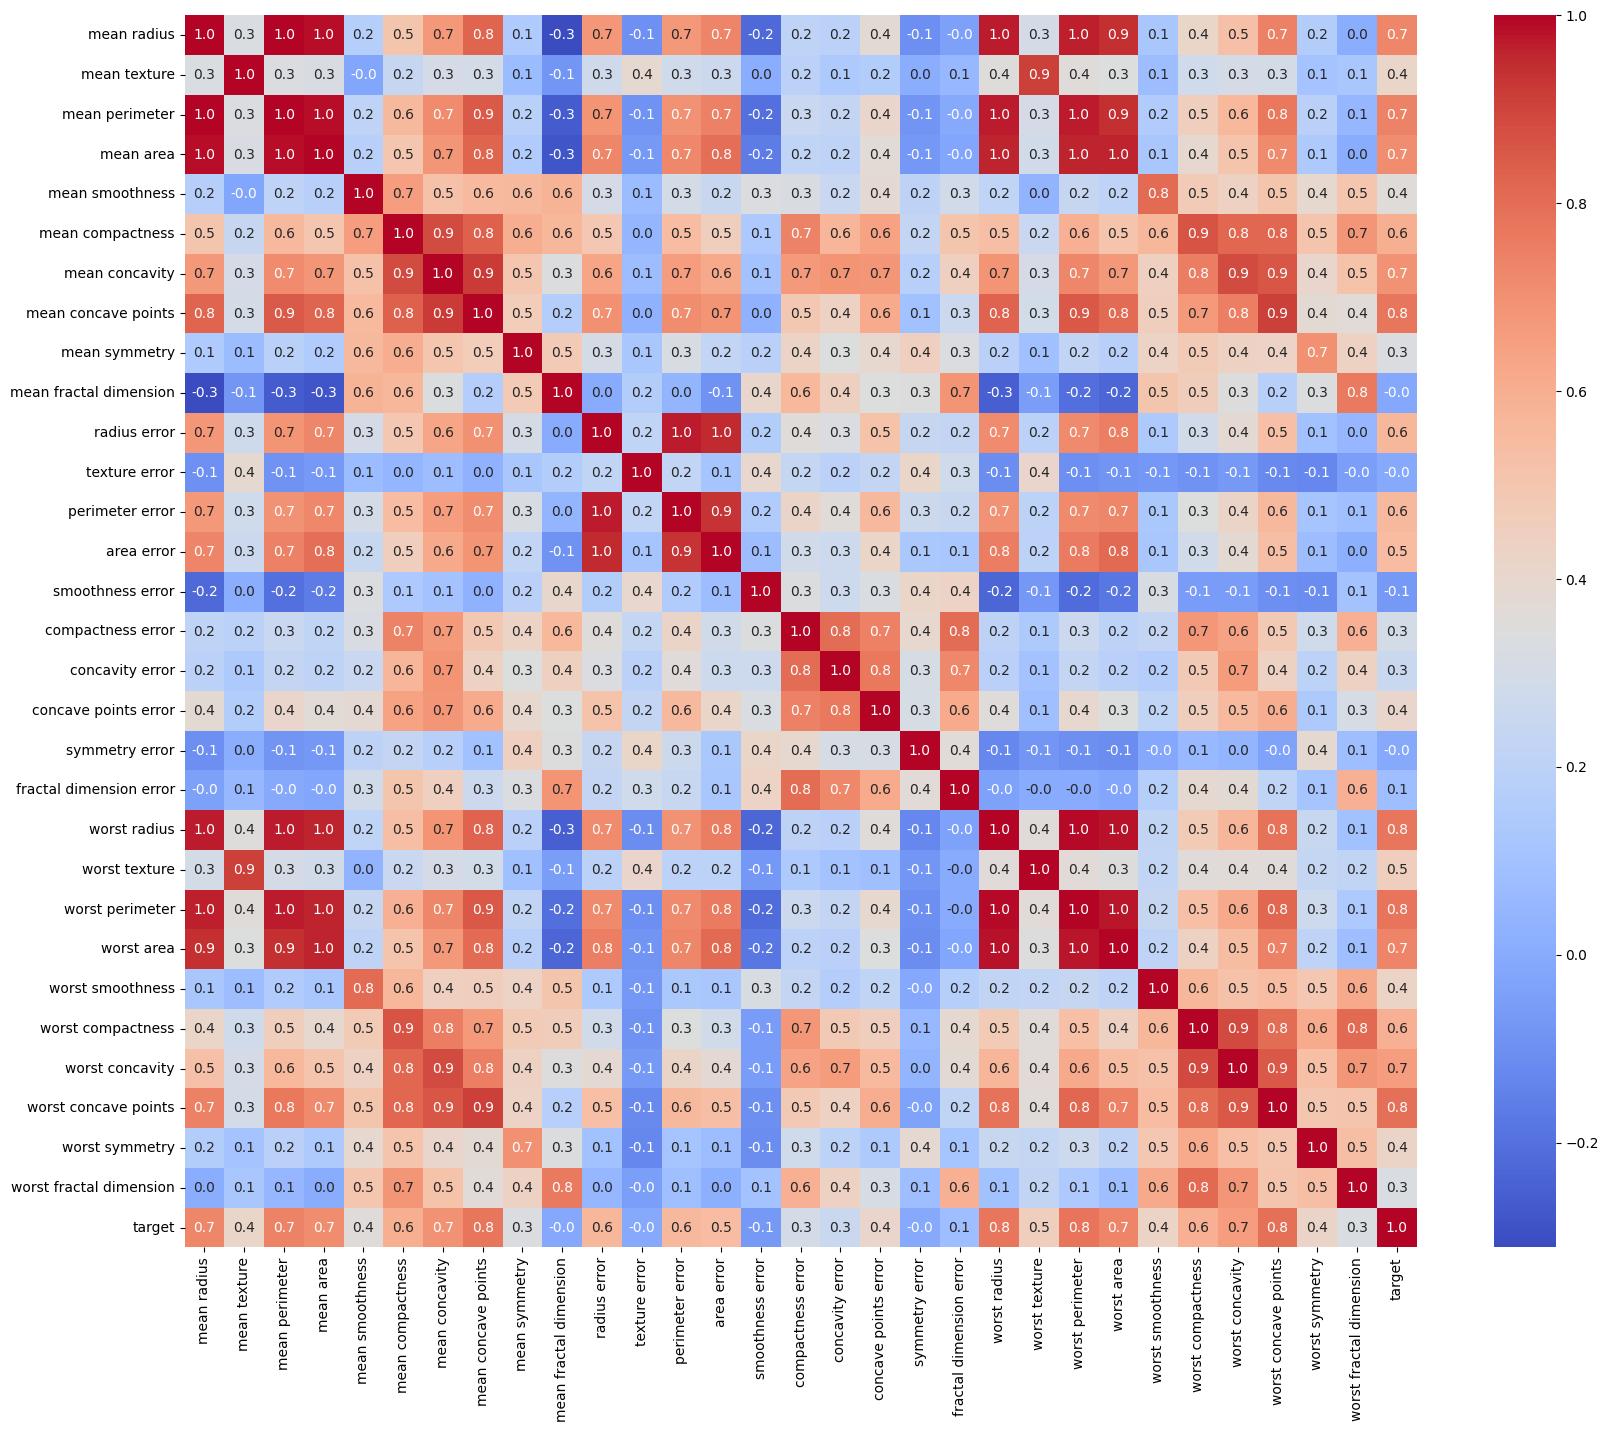

In [17]:
import seaborn as sns
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, fmt='.1f', square= True, cmap= 'coolwarm')
plt.show()

In [18]:
X = df.iloc[:,:-1]
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
y = df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)

In [22]:
X_train_t

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [23]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, average_precision_score, classification_report, confusion_matrix

In [320]:
all_results = []

In [321]:
# Creating unified comparison DataFrame
def unified_comparison(result=None):
    # Adding threshold-optimized results to comparison
    if result is not None:
        model_name = result.get('Model')

        # Find if model exists and get its index
        existing_index = None
        for i, r in enumerate(all_results):
            if r.get('Model') == model_name:
                existing_index = i
                break   

        if existing_index is not None:
            # Replace the existing result
            all_results[existing_index] = result
            print(f"\nModel '{model_name}' updated (replaced previous version).")
        else:
            # Add new result
            all_results.append(result)
    
    comparison_df = pd.DataFrame(all_results)
    comparison_df = comparison_df.sort_values(by=['PR-AUC', 'FN'], ascending=[False, True])

    print("\n" + "="*100)
    print(f"MODEL COMPARISON: {len(all_results)} model(s) run so far:")
    print("="*100)
    print(comparison_df.to_string(index=False))


In [322]:
# Common function to evaluate models
def evaluate_classifier(model, X_train, X_test, y_train, y_test, model_name,
                       param_grid=None, cv=5, scoring='average_precision', n_jobs= None, verbose= 0):

    print('='*70)
    print(f'{model_name.upper()}')
    print('='*70)
    
    # Perform GridSearchCV if param_grid is provided
    if param_grid is not None:
        from sklearn.model_selection import GridSearchCV
        
        grid = GridSearchCV(
            model, 
            param_grid, 
            cv=cv, 
            scoring=scoring,
            n_jobs=n_jobs,
            verbose= verbose,
            return_train_score=False
        )
        grid.fit(X_train, y_train)
        
        print(f"Best Parameters: {grid.best_params_}")
        print(f"Best CV Score ({scoring}): {grid.best_score_:.4f}")
        print()
        
        # Use best estimator for evaluation
        model = grid.best_estimator_
    else:
        # Fit if not already fitted
        if not hasattr(model, 'classes_'):
            model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate additional metrics for unified comparison
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Calculate metrics (same as before)
    results = {
        'Model': model_name.upper(),
        'ROC-AUC': roc_auc_score(y_test, y_proba),
        'PR-AUC': average_precision_score(y_test, y_proba),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
        'FN': int(fn),
        'FP': int(fp),
        'TN': int(tn),
        'TP': int(tp),
        'Recall': recall,
        'Specificity': specificity,
        'Precision': precision,
        'F1-Score': f1,
        'Threshold': 0.5,
        # 'Best_Params': None,
        # 'Best_CV_Score': None,
        # 'Param Grid': param_grid
    }
    
    # Add best params to results if grid search was performed
    if param_grid is not None:
        results['Best_Params'] = grid.best_params_
        results['Best_CV_Score'] = grid.best_score_
        results['Param Grid'] = param_grid
    
    # Print results
    print(f"{'ROC AUC:'.ljust(30)} {results['ROC-AUC']:.4f}")
    print(f"{'PR-AUC (Average Precision):'.ljust(30)} {results['PR-AUC']:.4f}")
    print(f"{'Accuracy:'.ljust(30)} {results['Accuracy']:.4f}")
    print(f"{'Balanced Accuracy:'.ljust(30)} {results['Balanced Accuracy']:.4f}")
    print(f"\n{'Classification Report:'.ljust(30)}\n{classification_report(y_test, y_pred)}")
    
    # ============================================================================
    # UNIFIED COMPARISON
    # ============================================================================

    unified_comparison(results)
    
    
    return results, model


In [323]:
# Threshold optimization function

from sklearn.metrics import confusion_matrix, average_precision_score, roc_auc_score


def threshold_optimization(best_model, X_test, y_test, model_name):
    print('='*100)
    print(f"{model_name.upper()}: DUAL THRESHOLD OPTIMIZATION")
    print('='*100)

    # Predicted probabilities on test set
    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Use unique sorted thresholds from predictions
    unique_thresholds = np.sort(np.unique(y_proba))

    # Calculate metrics for each threshold
    threshold_results = []

    for threshold in unique_thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        
        Recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        Precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        Specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
        
        f1 = 2 * (Precision * Recall) / (Precision + Recall) if (Precision + Recall) > 0 else 0
        Accuracy = (tp + tn) / (tp + tn + fp + fn)
        Balanced_Acc = (Recall + Specificity) / 2
        
        
        threshold_results.append({
            'Threshold': threshold,
            'FN': fn,
            'FP': fp,
            'TP': tp,
            'TN': tn,
            'Recall': Recall,  # Sensitivity
            'Specificity': Specificity,
            'Precision': Precision,  # PPV
            'F1-Score': f1,
            'Accuracy': Accuracy,
            'Balanced_Accuracy': Balanced_Acc
        })

    results_df = pd.DataFrame(threshold_results)

    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)

    print(f"\nThreshold-Independent Metrics:")
    print(f"  {'ROC-AUC:'.ljust(30)}{roc_auc:<30.4f}")
    print(f"  {'PR-AUC (Average Precision):'.ljust(30)}{pr_auc:.4f}")


    # ============================================================================
    # EXTRACT OPTIMAL ROW WITH FN=0 (MINIMUM FP)
    # ============================================================================

    zero_fn_rows = results_df[results_df['FN'] == 0]

    if len(zero_fn_rows) > 0:
        # Get row with MINIMUM FP among all FN=0 rows (optimal!)
        optimal_zero_fn = zero_fn_rows.loc[zero_fn_rows['FP'].idxmin()]
        
        # Convert to list
        optimal_zero_fn_list = optimal_zero_fn.tolist()
        
    # Convert to DICTIONARY instead of list, matching evaluate_classifier format
        optimal_zero_fn_dict = {
            'Model': f"{model_name.upper()} (FN=0 Optimized)",
            'ROC-AUC': roc_auc,  # Use the already calculated values
            'PR-AUC': pr_auc,
            'Accuracy': optimal_zero_fn['Accuracy'],
            'Balanced Accuracy': optimal_zero_fn['Balanced_Accuracy'],
            'TN': int(optimal_zero_fn['TN']),
            'FP': int(optimal_zero_fn['FP']),
            'FN': int(optimal_zero_fn['FN']),
            'TP': int(optimal_zero_fn['TP']),
            # 'Best_Params': None,  # Threshold optimization doesn't have hyperparameters
            # 'Best_CV_Score': None,
            'Threshold': optimal_zero_fn['Threshold'],  # Extra field specific to threshold optimization
            'Recall': optimal_zero_fn['Recall'],
            'Specificity': optimal_zero_fn['Specificity'],
            'Precision': optimal_zero_fn['Precision'],
            'F1-Score': optimal_zero_fn['F1-Score']
        }
    else:
        optimal_zero_fn_list = None
        print("\n⚠️ WARNING: No threshold achieves FN=0")


    # ============================================================================
    # TABLE 1: MINIMUM FP AT EACH FN LEVEL
    # ============================================================================

    optimal_by_fn = []
    for fn_level in range(3):
        fn_subset = results_df[results_df['FN'] == fn_level]
        if len(fn_subset) > 0:
            best_at_fn = fn_subset.loc[fn_subset['FP'].idxmin()]
            optimal_by_fn.append(best_at_fn)

    optimal_fn_df = pd.DataFrame(optimal_by_fn)

    print("\n" + "="*100)
    print("TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL")
    print("="*100)

    fn_table = optimal_fn_df[['FN', 'FP', 'TP', 'TN', 'Threshold', 
                            'Recall', 'Specificity','F1-Score', 'Accuracy', 'Balanced_Accuracy']].copy()


    fn_table = fn_table.round({
        'Threshold': 6,
        'Recall': 4,
        'Specificity': 4,
        'F1-Score': 4,
        'Accuracy': 4,
        'Balanced_Accuracy': 4
    })

    fn_table[['FN', 'FP', 'TP', 'TN']] = fn_table[['FN', 'FP', 'TP', 'TN']].astype(int)

    # Replace inf with a display-friendly value
    fn_table = fn_table.replace([np.inf, -np.inf], 999.99)

    print(fn_table.to_string(index=False))


    # ============================================================================
    # TABLE 2: MINIMUM FN AT EACH FP LEVEL
    # ============================================================================

    optimal_by_fp = []
    for fp_level in range(3):
        fp_subset = results_df[results_df['FP'] == fp_level]
        if len(fp_subset) > 0:
            best_at_fp = fp_subset.loc[fp_subset['FN'].idxmin()]
            optimal_by_fp.append(best_at_fp)

    optimal_fp_df = pd.DataFrame(optimal_by_fp)

    print("\n" + "="*100)
    print("TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL")
    print("="*100)

    fp_table = optimal_fp_df[['FP', 'FN', 'TP', 'TN', 'Threshold', 
                            'Recall', 'Specificity', 'F1-Score','Accuracy', 'Balanced_Accuracy']].copy()


    fp_table = fp_table.round({
        'Threshold': 6,
        'Recall': 4,
        'Specificity': 4,
        'F1-Score': 4,
        'Accuracy': 4,
        'Balanced_Accuracy': 4
    })

    fp_table[['FP', 'FN', 'TP', 'TN']] = fp_table[['FP', 'FN', 'TP', 'TN']].astype(int)

    # Replace inf with a display-friendly value
    fp_table = fp_table.replace([np.inf, -np.inf], 999.99)

    print(fp_table.to_string(index=False))
    print("="*100)

    # ============================================================================
    # UNIFIED COMPARISON
    # ============================================================================

    unified_comparison(optimal_zero_fn_dict)

    # ============================================================================
    # VISUALIZATION
    # ============================================================================

    fig = plt.figure(figsize=(12, 4))
    fig.suptitle(f"{model_name.upper()}: Threshold Optimization: FN vs FP", 
                fontsize=14)

    # Row 1: FN Perspective
    ax1 = plt.subplot(1, 2, 1)
    ax1.plot(optimal_fn_df['FN'], optimal_fn_df['FP'], marker='o', linewidth=2.5, 
            markersize=10, color='red', label='Min FP at each FN')
    ax1.set_xlabel('False Negatives (FN)')
    ax1.set_ylabel('False Positives (FP)')
    ax1.set_title('FN: Trade-off')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=8)

    # Row 2: FP Perspective
    ax2 = plt.subplot(1, 2, 2)
    ax2.plot(optimal_fp_df['FP'], optimal_fp_df['FN'], marker='s', linewidth=2.5, 
            markersize=10, color='blue', label='Min FN at each FP')
    ax2.set_xlabel('False Positives (FP)')
    ax2.set_ylabel('False Negatives (FN)')
    ax2.set_title('FP: Trade-off')
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=8)


    plt.tight_layout()
    plt.show()

    # ============================================================================
    # RETURN FIRST ZERO FN ROW AS LIST
    # ============================================================================
    return optimal_zero_fn_dict


In [324]:
def remove_model_from_all_results(model_to_remove):
    '''
    removes the selected model from all_results list
    '''

# Remove by iterating and matching
    print(f"No. of models initially: {len(all_results)}")
    for selected_model in all_results:
        if selected_model['Model'] == model_to_remove:
            all_results.remove(selected_model)
            print(f"{selected_model['Model']} has been removed")
            print(f"Remaining models = {len(all_results)}")
            break  # Stop after first match

In [326]:
# Logistic regression basic
from sklearn.linear_model import LogisticRegression

result, best_lr = evaluate_classifier(
    LogisticRegression(class_weight='balanced'), 
    X_train_t, X_test_t, y_train, y_test,
    "lr"
)

LR
ROC AUC:                       0.9974
PR-AUC (Average Precision):    0.9962
Accuracy:                      0.9825
Balanced Accuracy:             0.9813

Classification Report:        
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Model 'LR' updated (replaced previous version).

MODEL COMPARISON: 1 model(s) run so far:
Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold
   LR  0.99738 0.996203  0.982456            0.98133   1   1  70  42 0.976744     0.985915   0.976744  0.976744        0.5


LR: DUAL THRESHOLD OPTIMIZATION

Threshold-Independent Metrics:
  ROC-AUC:                      0.9974                        
  PR-AUC (Average Precision):   0.9962

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL
 FN  FP  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   7  43  64   0.121033  1.0000       0.9014    0.9247    0.9386             0.9507
  1   1  42  70   0.558083  0.9767       0.9859    0.9767    0.9825             0.9813
  2   0  41  71   0.834627  0.9535       1.0000    0.9762    0.9825             0.9767

TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL
 FP  FN  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   2  41  71   0.834627  0.9535       1.0000    0.9762    0.9825             0.9767
  1   1  42  70   0.558083  0.9767       0.9859    0.9767    0.9825             0.9813
  2   1  42  69   0.467077  0.9767       0.9718    0.9655    0.9737             0.9743

MODEL COMPARISON: 2

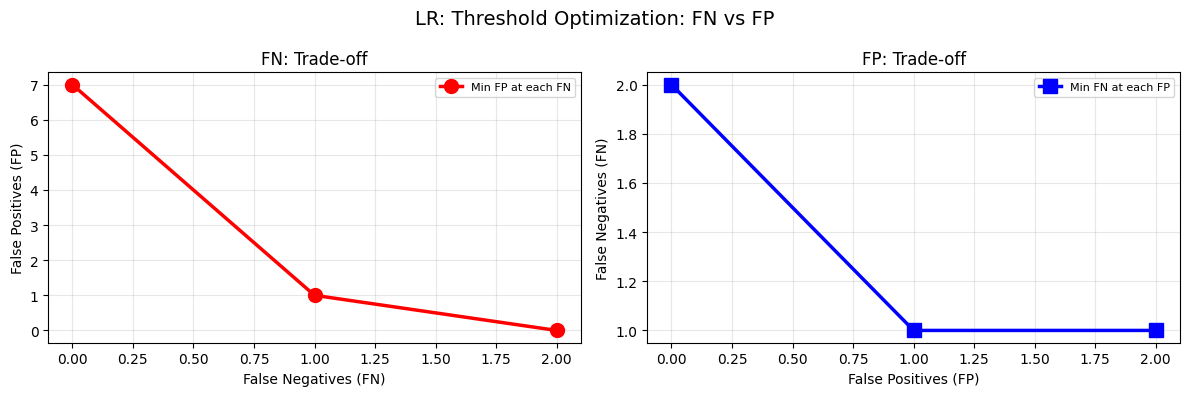

In [327]:
# Threshold optimization for LR
result = threshold_optimization(best_lr, X_test_t, y_test, 'lr')

In [328]:
# logistic regression with l2 regularization
from sklearn.model_selection import StratifiedKFold

ridge = LogisticRegression(
    penalty= 'l2',
    solver= 'lbfgs',
    max_iter= 1000,
    class_weight= 'balanced',
    random_state= 42
)

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

result, best_lr_l2 = evaluate_classifier(ridge, X_train_t, X_test_t, y_train, y_test, 'lr + l2', params, cv= cv, n_jobs=-1, verbose=1)

LR + L2
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 1}
Best CV Score (average_precision): 0.9934

ROC AUC:                       0.9974
PR-AUC (Average Precision):    0.9962
Accuracy:                      0.9825
Balanced Accuracy:             0.9813

Classification Report:        
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


MODEL COMPARISON: 3 model(s) run so far:
              Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold Best_Params  Best_CV_Score                            Param Grid
LR (FN=0 Optimized)  0.99738 0.996203  0.938596           0.950704   0   7  64  43 1.000000     0.901408   0

LR + L2: DUAL THRESHOLD OPTIMIZATION

Threshold-Independent Metrics:
  ROC-AUC:                      0.9974                        
  PR-AUC (Average Precision):   0.9962

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL
 FN  FP  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   7  43  64   0.121033  1.0000       0.9014    0.9247    0.9386             0.9507
  1   1  42  70   0.558083  0.9767       0.9859    0.9767    0.9825             0.9813
  2   0  41  71   0.834627  0.9535       1.0000    0.9762    0.9825             0.9767

TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL
 FP  FN  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   2  41  71   0.834627  0.9535       1.0000    0.9762    0.9825             0.9767
  1   1  42  70   0.558083  0.9767       0.9859    0.9767    0.9825             0.9813
  2   1  42  69   0.467077  0.9767       0.9718    0.9655    0.9737             0.9743

MODEL COMPARIS

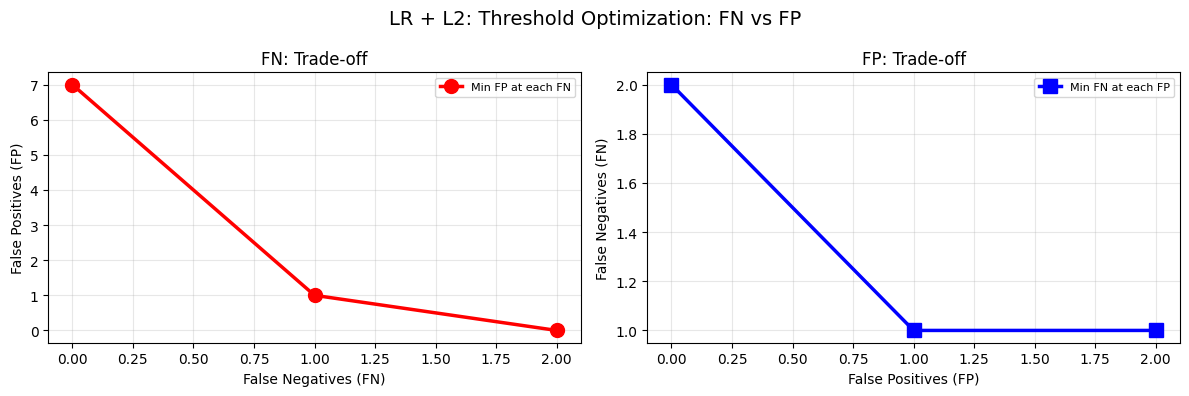

In [329]:
# Threshold optimization for LR Ridge
result = threshold_optimization(best_lr_l2, X_test_t, y_test, 'lr + L2')

since best C came out to be 1, results are identical to logistic regression which use it by default

In [330]:
# logistic regression with l1 regularization
lasso = LogisticRegression(
    penalty= 'l1',
    solver= 'liblinear',
    max_iter=1000,
    class_weight= 'balanced',
    random_state= 42
)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

result, best_lr_l1 = evaluate_classifier(lasso, X_train_t, X_test_t, y_train, y_test, 
                                         'lr + l1', params, cv= cv, n_jobs=-1, verbose=1
                                        )

LR + L1
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 1}
Best CV Score (average_precision): 0.9918

ROC AUC:                       0.9964
PR-AUC (Average Precision):    0.9944
Accuracy:                      0.9737
Balanced Accuracy:             0.9743

Classification Report:        
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


MODEL COMPARISON: 5 model(s) run so far:
                   Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold Best_Params  Best_CV_Score                            Param Grid
     LR (FN=0 Optimized) 0.997380 0.996203  0.938596           0.950704   0   7  64  43 1.000000     0.

LR + L1: DUAL THRESHOLD OPTIMIZATION

Threshold-Independent Metrics:
  ROC-AUC:                      0.9964                        
  PR-AUC (Average Precision):   0.9944

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL
 FN  FP  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   6  43  65   0.144153  1.0000       0.9155    0.9348    0.9474             0.9577
  1   2  42  69   0.582834  0.9767       0.9718    0.9655    0.9737             0.9743
  2   2  41  69   0.701678  0.9535       0.9718    0.9535    0.9649             0.9627

TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL
 FP  FN  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   4  39  71   0.939198  0.9070       1.0000    0.9512    0.9649             0.9535
  1   3  40  70   0.779682  0.9302       0.9859    0.9524    0.9649             0.9581
  2   1  42  69   0.582834  0.9767       0.9718    0.9655    0.9737             0.9743

MODEL COMPARIS

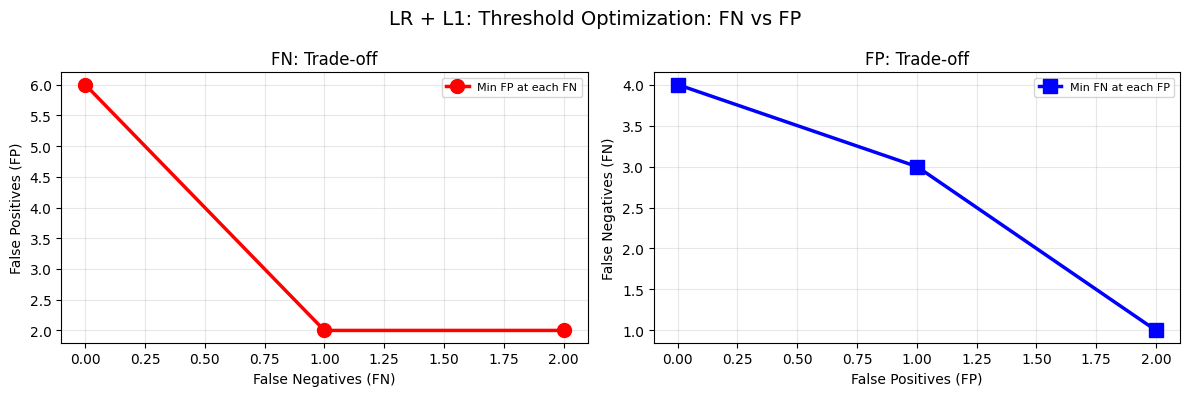

In [331]:
# Threshold optimization for LR Lasso
result = threshold_optimization(best_lr_l1, X_test_t, y_test, 'lr + L1')

In [332]:
# FEATURE SELECTION
print("\n" + "="*50)
print("LASSO FEATURE SELECTION")
print("="*50)

feature_names = list(X_train.columns)

coefs = best_lr_l1.coef_[0]

# Separate selected (non-zero) and eliminated (zero) features
selected_features = [(name, coef) for name, coef in zip(feature_names, coefs) if coef != 0]
eliminated_features = [name for name, coef in zip(feature_names, coefs) if coef == 0]

print(f"\nSELECTED FEATURES: {len(selected_features)} out of {len(feature_names)}")
print(f"ELIMINATED FEATURES: {len(eliminated_features)} out of {len(feature_names)}")

print("\n=== Selected Features (Non-Zero Coefficients) ===")
# Sort by absolute coefficient value
selected_sorted = sorted(selected_features, key=lambda x: abs(x[1]), reverse=True)
for name, coef in selected_sorted:
    print(f"{name.ljust(30)}: {coef:+.4f}")

if eliminated_features:
    print(f"\n=== Eliminated Features (Zero Coefficients) ===")
    for name in eliminated_features:
        print(f"{name.ljust(30)}: 0.0000 (not used)")


LASSO FEATURE SELECTION

SELECTED FEATURES: 16 out of 30
ELIMINATED FEATURES: 14 out of 30

=== Selected Features (Non-Zero Coefficients) ===
worst radius                  : +3.1401
radius error                  : +2.5872
mean concave points           : +2.3968
worst texture                 : +1.8341
worst concavity               : +1.3149
worst symmetry                : +1.1066
compactness error             : -0.8443
symmetry error                : -0.5037
smoothness error              : +0.4272
fractal dimension error       : -0.3006
texture error                 : -0.2992
worst concave points          : +0.2426
mean compactness              : -0.2056
mean symmetry                 : -0.1249
worst smoothness              : +0.1099
worst area                    : +0.0358

=== Eliminated Features (Zero Coefficients) ===
mean radius                   : 0.0000 (not used)
mean texture                  : 0.0000 (not used)
mean perimeter                : 0.0000 (not used)
mean area         

In [333]:
# Elasticnet
elastic = LogisticRegression(
    penalty= 'elasticnet',
    solver= 'saga',
    max_iter= 1000,
    class_weight= 'balanced',
    random_state= 42
)

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

cv = StratifiedKFold(
    n_splits= 5, shuffle= True, random_state= 42
)


result, best_lr_elastic = evaluate_classifier(elastic, X_train_t, X_test_t, y_train, y_test, 
                                         'elasticnet', 
                                         params, cv= cv, n_jobs=-1, verbose=1
                                        )


ELASTICNET
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 1, 'l1_ratio': 0.3}
Best CV Score (average_precision): 0.9938

ROC AUC:                       0.9974
PR-AUC (Average Precision):    0.9962
Accuracy:                      0.9825
Balanced Accuracy:             0.9813

Classification Report:        
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


MODEL COMPARISON: 7 model(s) run so far:
                   Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold               Best_Params  Best_CV_Score                                                                   Param Grid
     LR (FN=0 Optimized) 0.9

ELASTICNET: DUAL THRESHOLD OPTIMIZATION

Threshold-Independent Metrics:
  ROC-AUC:                      0.9974                        
  PR-AUC (Average Precision):   0.9962

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL
 FN  FP  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   7  43  64   0.115244  1.0000       0.9014    0.9247    0.9386             0.9507
  1   1  42  70   0.567648  0.9767       0.9859    0.9767    0.9825             0.9813
  2   0  41  71   0.834081  0.9535       1.0000    0.9762    0.9825             0.9767

TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL
 FP  FN  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   2  41  71   0.834081  0.9535       1.0000    0.9762    0.9825             0.9767
  1   1  42  70   0.567648  0.9767       0.9859    0.9767    0.9825             0.9813
  2   1  42  69   0.489136  0.9767       0.9718    0.9655    0.9737             0.9743

Model 'ELAS

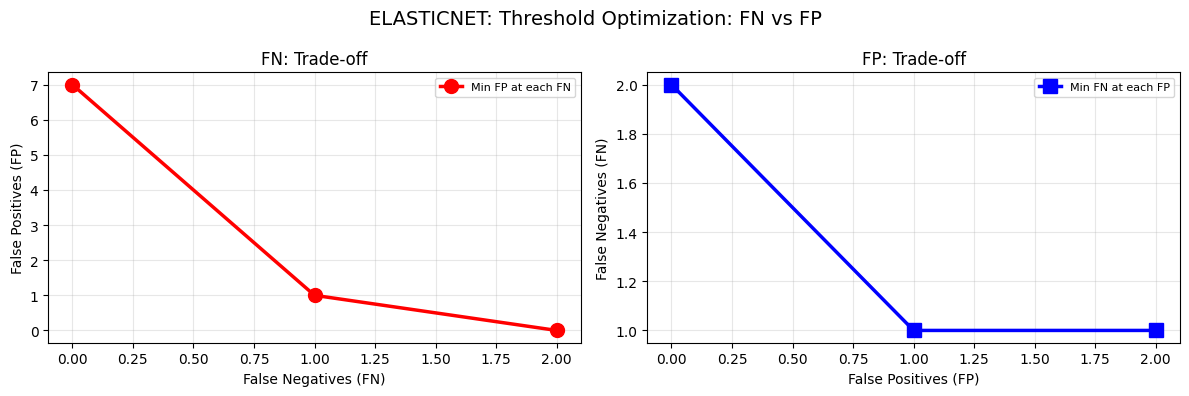

In [343]:
# Threshold optimization for Elasticnet
result = threshold_optimization(best_lr_elastic, X_test_t, y_test, 'elasticnet')

In [335]:

# FEATURE SELECTION ANALYSIS
print("\n" + "="*50)
print("ELASTIC NET FEATURE SELECTION")
print("="*50)

feature_names = list(X_train.columns)
coefs = best_lr_elastic.coef_[0]

# Separate selected (non-zero) and eliminated (near-zero) features
# Use small threshold since Elastic Net rarely gives exact zeros
threshold = 1e-5
selected_features = [(name, coef) for name, coef in zip(feature_names, coefs) if abs(coef) > threshold]
eliminated_features = [(name, coef) for name, coef in zip(feature_names, coefs) if abs(coef) <= threshold]

print(f"\nSELECTED FEATURES: {len(selected_features)} out of {len(feature_names)}")
print(f"ELIMINATED FEATURES: {len(eliminated_features)} out of {len(feature_names)}")

print("\n=== Selected Features (Non-Zero Coefficients) ===")
# Sort by absolute coefficient value
selected_sorted = sorted(selected_features, key=lambda x: abs(x[1]), reverse=True)
for name, coef in selected_sorted:
    print(f"{name.ljust(30)}: {coef:+.4f}")

if eliminated_features:
    print(f"\n=== Eliminated Features (Near-Zero Coefficients) ===")
    for name, coef in eliminated_features:
        print(f"{name.ljust(30)}: {coef:+.4f} (not used)")



ELASTIC NET FEATURE SELECTION

SELECTED FEATURES: 27 out of 30
ELIMINATED FEATURES: 3 out of 30

=== Selected Features (Non-Zero Coefficients) ===
radius error                  : +1.4482
worst texture                 : +1.4154
mean concave points           : +1.2514
worst symmetry                : +1.2118
worst radius                  : +0.9598
worst concavity               : +0.9117
area error                    : +0.9105
worst area                    : +0.8943
worst concave points          : +0.8431
compactness error             : -0.6967
mean concavity                : +0.6683
worst perimeter               : +0.5590
symmetry error                : -0.5356
perimeter error               : +0.5083
mean compactness              : -0.4973
fractal dimension error       : -0.4774
worst smoothness              : +0.4755
mean area                     : +0.3630
mean radius                   : +0.3218
mean texture                  : +0.2969
smoothness error              : +0.2870
mean perimet

# KNN

In [336]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, balanced_accuracy_score, average_precision_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors= 5)

cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

result, best_knn = evaluate_classifier(knn, X_train_t, X_test_t, y_train, y_test, 
                                         'knn basic', cv= cv, n_jobs=-1, verbose=1
                                        )

KNN BASIC
ROC AUC:                       0.9820
PR-AUC (Average Precision):    0.9732
Accuracy:                      0.9474
Balanced Accuracy:             0.9440

Classification Report:        
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


MODEL COMPARISON: 9 model(s) run so far:
                      Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold               Best_Params  Best_CV_Score                                                                   Param Grid
        LR (FN=0 Optimized) 0.997380 0.996203  0.938596           0.950704   0   7  64  43 1.000000     0.901408   0.860000  0.924731   0.121033                       NaN    

In [337]:
# KNN hyperparameter tuning
from sklearn.model_selection import StratifiedKFold

knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3,5,7,9,11,15,21],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2, 3, 4, 5]
}


cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

result, best_knn_tuned = evaluate_classifier(knn, X_train_t, X_test_t, y_train, y_test, 
                                         'knn tuned', param_grid= params, cv= cv, n_jobs=-1, verbose=1
                                        )

KNN TUNED
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best Parameters: {'metric': 'minkowski', 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Best CV Score (average_precision): 0.9914

ROC AUC:                       0.9823
PR-AUC (Average Precision):    0.9791
Accuracy:                      0.9474
Balanced Accuracy:             0.9440

Classification Report:        
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


MODEL COMPARISON: 10 model(s) run so far:
                      Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold                                                              Best_Params  Best_CV_Score         


PCA ANALYSIS
Original features: 30
PCA components: 10
Dimensionality reduction: 30 → 10 (33.3% of features)

Total variance explained: 0.9511 (95.11%)

Variance per component:
  PC1: 0.4350 (43.50%) | Cumulative: 0.4350 (43.50%)
  PC2: 0.1950 (19.50%) | Cumulative: 0.6300 (63.00%)
  PC3: 0.0978 (9.78%) | Cumulative: 0.7278 (72.78%)
  PC4: 0.0649 (6.49%) | Cumulative: 0.7927 (79.27%)
  PC5: 0.0525 (5.25%) | Cumulative: 0.8452 (84.52%)
  PC6: 0.0411 (4.11%) | Cumulative: 0.8864 (88.64%)
  PC7: 0.0224 (2.24%) | Cumulative: 0.9087 (90.87%)
  PC8: 0.0165 (1.65%) | Cumulative: 0.9252 (92.52%)
  PC9: 0.0138 (1.38%) | Cumulative: 0.9390 (93.90%)
  PC10: 0.0121 (1.21%) | Cumulative: 0.9511 (95.11%)


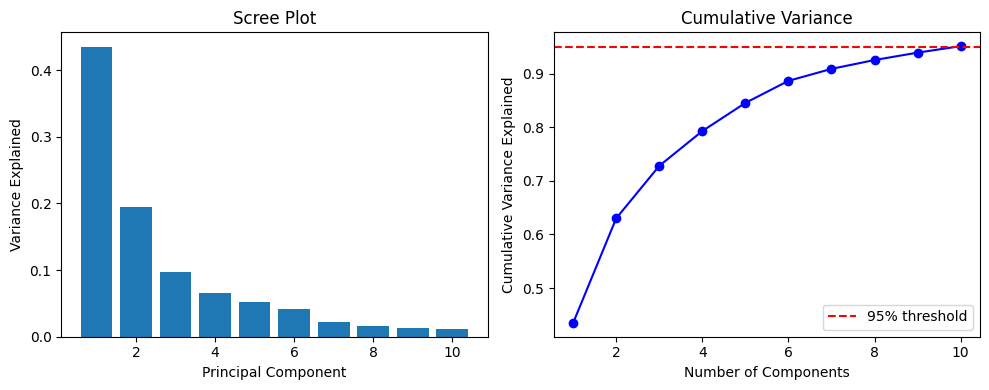

In [338]:
# doing PCA to check if there is any imporovement

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keep 95% variance
X_train_pca = pca.fit_transform(X_train_t)
X_test_pca = pca.transform(X_test_t)

print("\n" + "="*50)
print("PCA ANALYSIS")
print("="*50)

print(f"Original features: {X_train_t.shape[1]}")
print(f"PCA components: {pca.n_components_}")
print(f"Dimensionality reduction: {X_train_t.shape[1]} → {pca.n_components_} ({pca.n_components_/X_train_t.shape[1]*100:.1f}% of features)")

# Total variance explained
total_var = pca.explained_variance_ratio_.sum()
print(f"\nTotal variance explained: {total_var:.4f} ({total_var*100:.2f}%)")

# Individual component variance
print(f"\nVariance per component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    cumsum = pca.explained_variance_ratio_[:i+1].sum()
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%) | Cumulative: {cumsum:.4f} ({cumsum*100:.2f}%)")

# Scree plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(range(1, pca.n_components_+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')

plt.subplot(1, 2, 2)
plt.plot(range(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance')
plt.legend()
plt.tight_layout()
plt.show()


In [340]:
# Doing KNN again with PCA data

from sklearn.model_selection import GridSearchCV, StratifiedKFold

knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3,5,7,9,11,15,21],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2, 3, 4, 5]
}


cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)


result, best_knn_pca = evaluate_classifier(knn, X_train_pca, X_test_pca, y_train, y_test, 
                                         'knn after pca', param_grid= params, cv= cv, n_jobs=-1, verbose=1
                                        )

KNN AFTER PCA
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best Parameters: {'metric': 'minkowski', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best CV Score (average_precision): 0.9894

ROC AUC:                       0.9905
PR-AUC (Average Precision):    0.9859
Accuracy:                      0.9649
Balanced Accuracy:             0.9627

Classification Report:        
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Model 'KNN AFTER PCA' updated (replaced previous version).

MODEL COMPARISON: 11 model(s) run so far:
                      Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold                                 

KNN PCA: DUAL THRESHOLD OPTIMIZATION

Threshold-Independent Metrics:
  ROC-AUC:                      0.9905                        
  PR-AUC (Average Precision):   0.9859

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL
 FN  FP  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0  11  43  60   0.099431  1.0000       0.8451    0.8866    0.9035             0.9225
  1   8  42  63   0.124604  0.9767       0.8873    0.9032    0.9211             0.9320
  2   2  41  69   0.551238  0.9535       0.9718    0.9535    0.9649             0.9627

TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL
 FP  FN  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   7  36  71   0.796841  0.8372       1.0000    0.9114    0.9386             0.9186
  1   7  36  70   0.789581  0.8372       0.9859    0.9000    0.9298             0.9116
  2   2  41  69   0.551238  0.9535       0.9718    0.9535    0.9649             0.9627

MODEL COMPARIS

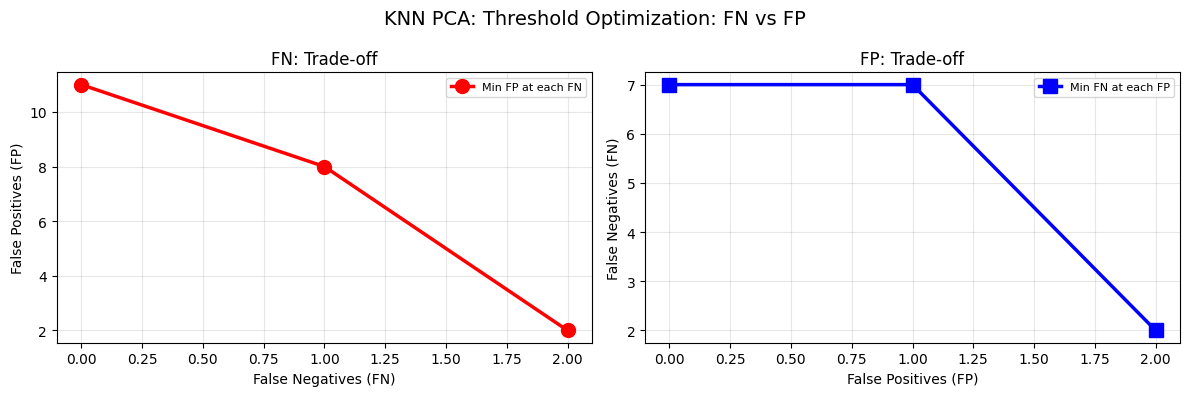

In [ ]:
# Threshold optimization for KNN
result = threshold_optimization(best_knn_pca,
                                X_test_pca,
                                y_test,
                                'knn pca'
)

# SVM

In [350]:
from sklearn.svm import SVC

# Taking default values of hyperparameters first
svc = SVC(
    kernel= 'rbf',
    C= 1.0,
    gamma= 'scale',
    class_weight= 'balanced',
    probability= True,
    random_state= 42
)


result, best_svc = evaluate_classifier(svc, 
                                           X_train_t, X_test_t, 
                                           y_train, y_test, 
                                         'svc',
                                        #  param_grid= params,
                                         cv= cv, 
                                         n_jobs=-1, 
                                         verbose=1
)

SVC
ROC AUC:                       0.9971
PR-AUC (Average Precision):    0.9956
Accuracy:                      0.9649
Balanced Accuracy:             0.9627

Classification Report:        
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Model 'SVC' updated (replaced previous version).

MODEL COMPARISON: 14 model(s) run so far:
                      Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold                                                              Best_Params  Best_CV_Score                                                                                                                   Param Grid
        LR (FN=0 Optimized) 0.9973

In [365]:
# SVC with hyperparameter tuning
svc = SVC(
    class_weight= 'balanced',
    probability= True,
    random_state= 42
)

params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

cv = StratifiedKFold(n_splits= 5, shuffle=True, random_state= 42)

result, best_svc_tuned = evaluate_classifier(svc,
                                             X_train_t, X_test_t,
                                             y_train, y_test,
                                             'svc tuned',
                                             param_grid= params,
                                             cv= cv,
                                             n_jobs= -1,
                                             verbose= 1

)


SVC TUNED
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV Score (average_precision): 0.9955

ROC AUC:                       0.9964
PR-AUC (Average Precision):    0.9948
Accuracy:                      0.9825
Balanced Accuracy:             0.9767

Classification Report:        
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Model 'SVC TUNED' updated (replaced previous version).

MODEL COMPARISON: 24 model(s) run so far:
                               Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold                                                               

SVC: DUAL THRESHOLD OPTIMIZATION

Threshold-Independent Metrics:
  ROC-AUC:                      0.9964                        
  PR-AUC (Average Precision):   0.9948

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL
 FN  FP  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   8  43  63   0.089500  1.0000       0.8873    0.9149    0.9298             0.9437
  1   3  42  68   0.344213  0.9767       0.9577    0.9545    0.9649             0.9672
  2   0  41  71   0.886081  0.9535       1.0000    0.9762    0.9825             0.9767

TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL
 FP  FN  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   2  41  71   0.886081  0.9535       1.0000    0.9762    0.9825             0.9767
  1   2  41  70   0.467916  0.9535       0.9859    0.9647    0.9737             0.9697
  2   2  41  69   0.443752  0.9535       0.9718    0.9535    0.9649             0.9627

Model 'SVC (FN=0 O

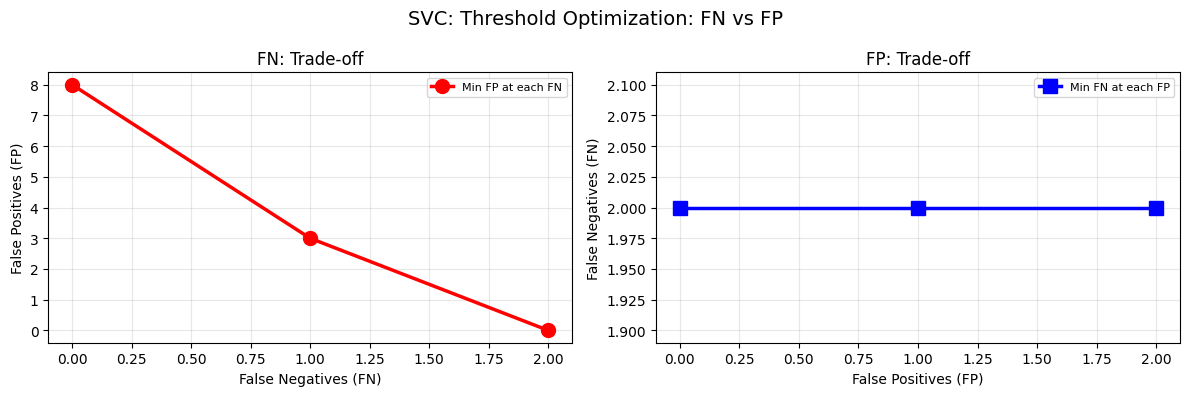

In [366]:
# Threshold optimization for SVC
result = threshold_optimization(best_svc_tuned, X_test_t, y_test, 'svc')

# NAIVE BAYES

In [367]:
# 
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

result, best_nb = evaluate_classifier(nb,
                                      X_train_t, X_test_t,
                                      y_train, y_test,
                                      'naive bayes',
                                    #   param_grid= params,
                                      cv= cv,
                                      n_jobs= -1,
                                      verbose= 1
)


NAIVE BAYES
ROC AUC:                       0.9974
PR-AUC (Average Precision):    0.9958
Accuracy:                      0.9649
Balanced Accuracy:             0.9581

Classification Report:        
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Model 'NAIVE BAYES' updated (replaced previous version).

MODEL COMPARISON: 24 model(s) run so far:
                               Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold                                                                                                  Best_Params  Best_CV_Score                                                                                                   

In [368]:
# Naive Bayes hyperparameter tuning
nb = GaussianNB()

params = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

cv = StratifiedKFold(n_splits=5, shuffle= True, random_state= 42)

result, best_nb_tuned = evaluate_classifier(nb,
                                      X_train_t, X_test_t,
                                      y_train, y_test,
                                      'naive bayes tuned',
                                      param_grid= params,
                                      cv= cv,
                                      n_jobs= -1,
                                      verbose= 1
)


NAIVE BAYES TUNED
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'var_smoothing': 1e-10}
Best CV Score (average_precision): 0.9604

ROC AUC:                       0.9974
PR-AUC (Average Precision):    0.9958
Accuracy:                      0.9649
Balanced Accuracy:             0.9581

Classification Report:        
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Model 'NAIVE BAYES TUNED' updated (replaced previous version).

MODEL COMPARISON: 24 model(s) run so far:
                               Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold                                                                  

NAIVE BAYES TUNED: DUAL THRESHOLD OPTIMIZATION

Threshold-Independent Metrics:
  ROC-AUC:                      0.9974                        
  PR-AUC (Average Precision):   0.9958

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL
 FN  FP  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   4  43  67   0.000021  1.0000       0.9437    0.9556    0.9649             0.9718
  1   2  42  69   0.012629  0.9767       0.9718    0.9655    0.9737             0.9743
  2   1  41  70   0.034647  0.9535       0.9859    0.9647    0.9737             0.9697

TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL
 FP  FN  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   4  39  71   0.989432  0.9070       1.0000    0.9512    0.9649             0.9535
  1   2  41  70   0.034647  0.9535       0.9859    0.9647    0.9737             0.9697
  2   1  42  69   0.012629  0.9767       0.9718    0.9655    0.9737             0.9743

Mode

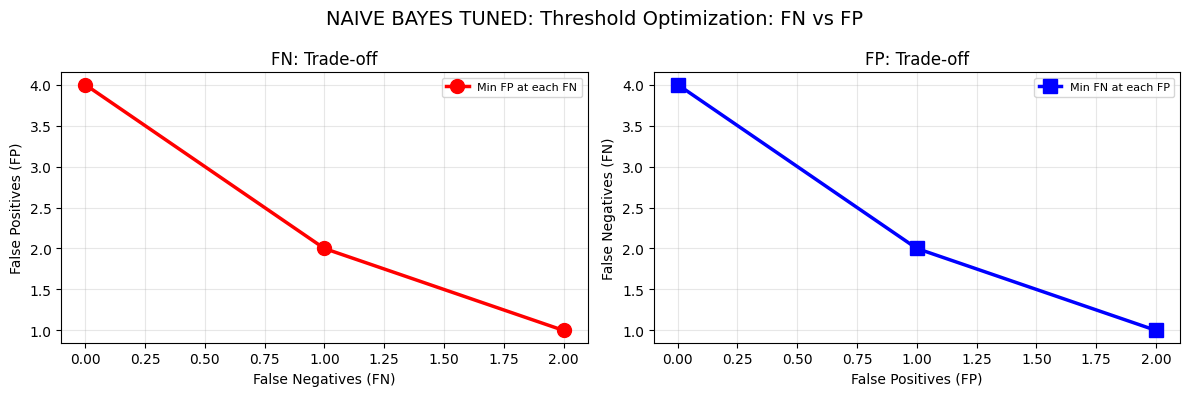

In [369]:
# Threshold optimization for Naive Bayes

result = threshold_optimization(best_nb_tuned,
                                X_test_t,
                                y_test,
                                'naive bayes tuned'
)


# DECISION TREE

In [370]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

result, best_dt = evaluate_classifier(dt,
                                             X_train_t, X_test_t,
                                             y_train, y_test,
                                             'decision tree'
)

DECISION TREE
ROC AUC:                       0.9510
PR-AUC (Average Precision):    0.9123
Accuracy:                      0.9561
Balanced Accuracy:             0.9510

Classification Report:        
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Model 'DECISION TREE' updated (replaced previous version).

MODEL COMPARISON: 24 model(s) run so far:
                               Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold                                                                                                  Best_Params  Best_CV_Score                                                                                               

In [371]:
# Decision Tree hyperparameter tuning
from sklearn.model_selection import StratifiedKFold
dt = DecisionTreeClassifier(class_weight= 'balanced', 
                            random_state=42
                            )

params = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
}

cv = StratifiedKFold(n_splits=5, shuffle= True, random_state= 42)


result, best_dt_tuned = evaluate_classifier(dt,
                                             X_train_t, X_test_t,
                                             y_train, y_test,
                                             'decision tree tuned',
                                             param_grid= params,
                                             cv= cv,
                                             n_jobs= -1,
                                             verbose= 1
)

DECISION TREE TUNED
Fitting 5 folds for each of 224 candidates, totalling 1120 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best CV Score (average_precision): 0.9357

ROC AUC:                       0.9630
PR-AUC (Average Precision):    0.9396
Accuracy:                      0.9474
Balanced Accuracy:             0.9440

Classification Report:        
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Model 'DECISION TREE TUNED' updated (replaced previous version).

MODEL COMPARISON: 24 model(s) run so far:
                               Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Thresh

DECISION TREE TUNED: DUAL THRESHOLD OPTIMIZATION

Threshold-Independent Metrics:
  ROC-AUC:                      0.9630                        
  PR-AUC (Average Precision):   0.9396

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL
 FN  FP  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0  71  43   0   0.000000  1.0000       0.0000    0.5478    0.3772             0.5000
  2   9  41  62   0.438538  0.9535       0.8732    0.8817    0.9035             0.9134

TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL
 FP  FN  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  1   5  38  70   0.699422  0.8837       0.9859    0.9268    0.9474             0.9348
  2   3  40  69   0.628571  0.9302       0.9718    0.9412    0.9561             0.9510

Model 'DECISION TREE TUNED (FN=0 Optimized)' updated (replaced previous version).

MODEL COMPARISON: 24 model(s) run so far:
                               Model  ROC-AUC   PR-

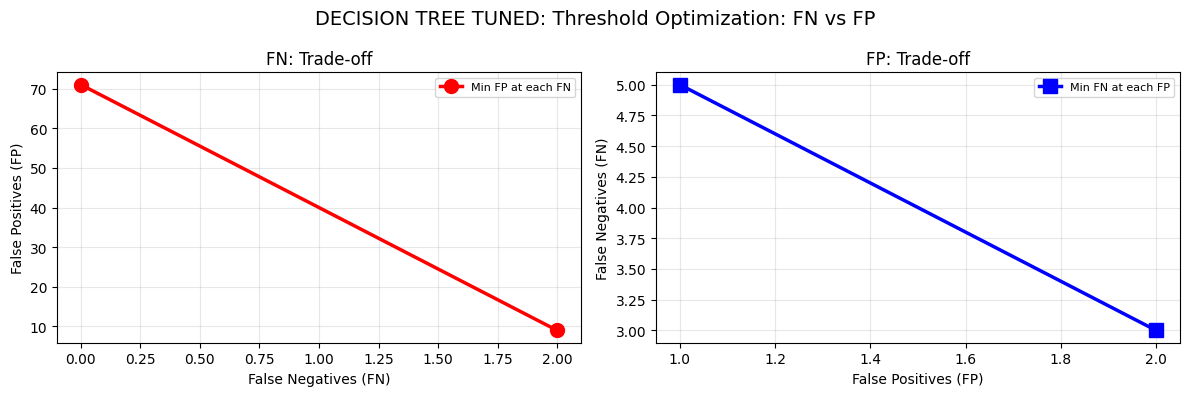

In [372]:
# Threshold optimization for Decision Tree

result = threshold_optimization(best_dt_tuned,
                                X_test_t,
                                y_test,
                                'decision tree tuned'
)

# RANDOM FOREST

In [373]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

result, best_rf = evaluate_classifier(rf,
                                             X_train_t, X_test_t,
                                             y_train, y_test,
                                             'random forest',
)

RANDOM FOREST
ROC AUC:                       0.9984
PR-AUC (Average Precision):    0.9974
Accuracy:                      0.9649
Balanced Accuracy:             0.9581

Classification Report:        
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Model 'RANDOM FOREST' updated (replaced previous version).

MODEL COMPARISON: 24 model(s) run so far:
                               Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold                                                                                                  Best_Params  Best_CV_Score                                                                                               

In [374]:
# Random Forest hyperparameter tuning

rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

result, best_rf_tuned = evaluate_classifier(rf,
                                             X_train_t, X_test_t,
                                             y_train, y_test,
                                             'random forest tuned',
                                             param_grid= params,
                                             cv= cv,
                                             n_jobs= -1,
                                             verbose= 1
)


RANDOM FOREST TUNED
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best CV Score (average_precision): 0.9856

ROC AUC:                       0.9987
PR-AUC (Average Precision):    0.9979
Accuracy:                      0.9649
Balanced Accuracy:             0.9581

Classification Report:        
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Model 'RANDOM FOREST TUNED' updated (replaced previous version).

MODEL COMPARISON: 24 model(s) run so far:
                               Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Prec

RANDOM FOREST TUNED: DUAL THRESHOLD OPTIMIZATION

Threshold-Independent Metrics:
  ROC-AUC:                      0.9987                        
  PR-AUC (Average Precision):   0.9979

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL
 FN  FP  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   2  43  69   0.354608  1.0000       0.9718    0.9773    0.9825             0.9859
  1   1  42  70   0.478640  0.9767       0.9859    0.9767    0.9825             0.9813
  2   1  41  70   0.485550  0.9535       0.9859    0.9647    0.9737             0.9697

TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL
 FP  FN  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   3  40  71   0.666866  0.9302       1.0000    0.9639    0.9737             0.9651
  1   1  42  70   0.478640  0.9767       0.9859    0.9767    0.9825             0.9813
  2   0  43  69   0.354608  1.0000       0.9718    0.9773    0.9825             0.9859

Mo

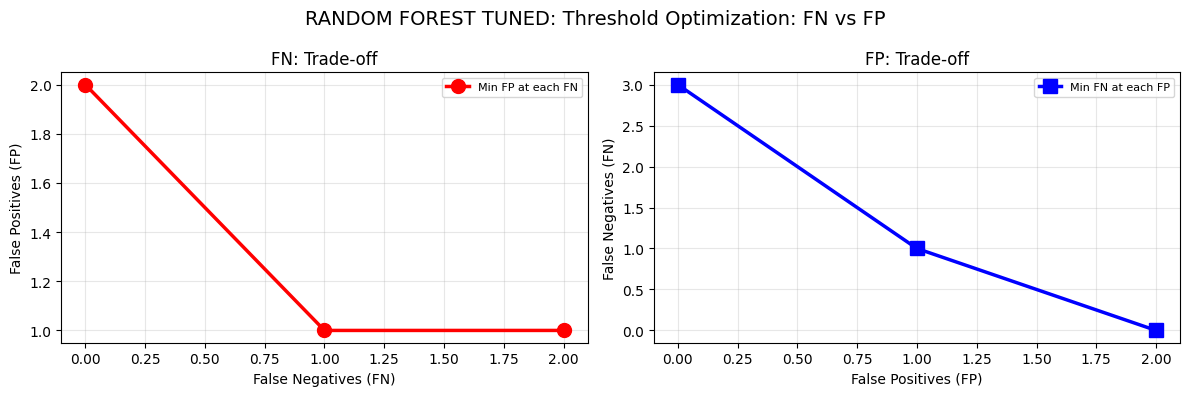

In [375]:
# Threshold optimization for Random Forest

result = threshold_optimization(best_rf_tuned,
                                X_test_t,
                                y_test,
                                'random forest tuned'
)

# ADABOOST

In [376]:
# Adaboost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


adaboost = AdaBoostClassifier(
    estimator= DecisionTreeClassifier(max_depth= 1,
                                      class_weight= 'balanced')
    )

params = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3]
}

result, best_adaboost = evaluate_classifier(adaboost,
                                             X_train_t, X_test_t,
                                             y_train, y_test,
                                             'adaboost',
                                             param_grid= params,
                                             cv= cv,
                                             n_jobs= -1,
                                             verbose= 1
)


ADABOOST
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'estimator__max_depth': 2, 'learning_rate': 1.0, 'n_estimators': 50}
Best CV Score (average_precision): 0.9949

ROC AUC:                       0.9898
PR-AUC (Average Precision):    0.9879
Accuracy:                      0.9737
Balanced Accuracy:             0.9697

Classification Report:        
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


MODEL COMPARISON: 25 model(s) run so far:
                               Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold                                                                                            

ADABOOST: DUAL THRESHOLD OPTIMIZATION

Threshold-Independent Metrics:
  ROC-AUC:                      0.9898                        
  PR-AUC (Average Precision):   0.9879

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL
 FN  FP  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0  23  43  48   0.296250  1.0000       0.6761    0.7890    0.7982             0.8380
  1   6  42  65   0.393441  0.9767       0.9155    0.9231    0.9386             0.9461
  2   1  41  70   0.500713  0.9535       0.9859    0.9647    0.9737             0.9697

TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL
 FP  FN  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   4  39  71   0.558200  0.9070       1.0000    0.9512    0.9649             0.9535
  1   2  41  70   0.500713  0.9535       0.9859    0.9647    0.9737             0.9697
  2   2  41  69   0.445534  0.9535       0.9718    0.9535    0.9649             0.9627

MODEL COMPARI

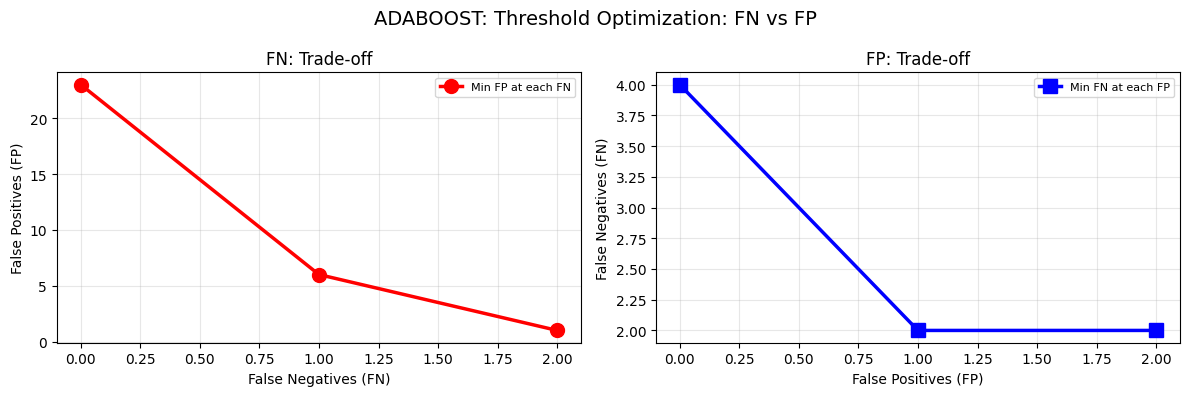

In [377]:
# Adaboost threshold optimization

result = threshold_optimization(best_adaboost,
                                X_test_t,
                                y_test,
                                'adaboost'
)

# GRADIENT BOOST

In [378]:
# Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier


gb = GradientBoostingClassifier(
    loss= 'log_loss',
    random_state= 42
)

params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 10, 20],
    'subsample': [0.8, 1.0]
}

cv = StratifiedKFold(n_splits= 5, shuffle= True, random_state= 42)

result, best_gb = evaluate_classifier(gb,
                                             X_train_t, X_test_t,
                                             y_train, y_test,
                                             'gradient boost',
                                             param_grid= params,
                                             cv= cv,
                                             n_jobs= -1,
                                             verbose= 1
)

GRADIENT BOOST
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}
Best CV Score (average_precision): 0.9914

ROC AUC:                       0.9951
PR-AUC (Average Precision):    0.9928
Accuracy:                      0.9649
Balanced Accuracy:             0.9581

Classification Report:        
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


MODEL COMPARISON: 27 model(s) run so far:
                               Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold                                                     

GRADIENT BOOST: DUAL THRESHOLD OPTIMIZATION

Threshold-Independent Metrics:
  ROC-AUC:                      0.9951                        
  PR-AUC (Average Precision):   0.9928

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL
 FN  FP  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   9  43  62   0.000003  1.0000       0.8732    0.9053    0.9211             0.9366
  1   3  42  68   0.003897  0.9767       0.9577    0.9545    0.9649             0.9672
  2   3  41  68   0.056500  0.9535       0.9577    0.9425    0.9561             0.9556

TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL
 FP  FN  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   3  40  71   0.998286  0.9302       1.0000    0.9639    0.9737             0.9651
  1   3  40  70   0.993727  0.9302       0.9859    0.9524    0.9649             0.9581
  2   3  40  69   0.445513  0.9302       0.9718    0.9412    0.9561             0.9510

MODEL C

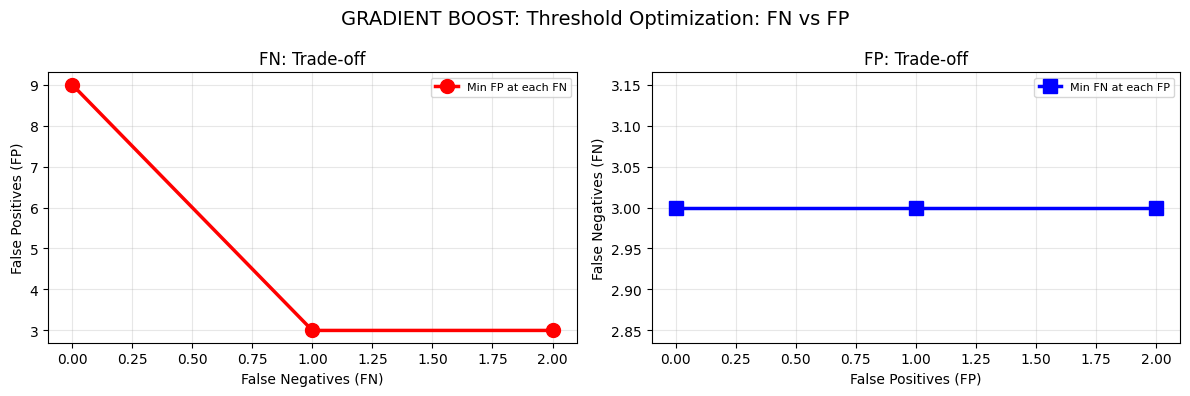

In [379]:
# Gradient Boost threshold optimization

result = threshold_optimization(best_gb,
                                X_test_t,
                                y_test,
                                'gradient boost'
)

# XGBOOST

In [380]:
# XGBoost

import xgboost as xgb
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix

n_neg = (y_train == 0).sum()
n_pos = (y_train == 1).sum()
scale_pos_weight = n_neg/n_pos
print(f'scale_pos_weight = {scale_pos_weight:.2f}')

xgb_model = xgb.XGBClassifier(
    scale_pos_weight = scale_pos_weight,
    random_state = 42,
    eval_metric = 'logloss',
)

result, best_xgb = evaluate_classifier(xgb_model,
                                             X_train_t, X_test_t,
                                             y_train, y_test,
                                             'xgboost'
)

scale_pos_weight = 1.69
XGBOOST
ROC AUC:                       0.9954
PR-AUC (Average Precision):    0.9938
Accuracy:                      0.9649
Balanced Accuracy:             0.9581

Classification Report:        
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


MODEL COMPARISON: 29 model(s) run so far:
                               Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Threshold                                                                                                  Best_Params  Best_CV_Score                                                                                                                                         

In [381]:
# XGBoost hyperparameter tuning

xgb_model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_lambda': [1, 5]
}

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

result, best_xgb_tuned = evaluate_classifier(xgb_model,
                                             X_train_t, X_test_t,
                                             y_train, y_test,
                                             'xgboost tuned',
                                             param_grid= params,
                                             cv= cv,
                                             n_jobs= -1,
                                             verbose= 1
)


XGBOOST TUNED
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'reg_lambda': 5, 'subsample': 0.8}
Best CV Score (average_precision): 0.9919

ROC AUC:                       0.9951
PR-AUC (Average Precision):    0.9931
Accuracy:                      0.9561
Balanced Accuracy:             0.9510

Classification Report:        
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


MODEL COMPARISON: 30 model(s) run so far:
                               Model  ROC-AUC   PR-AUC  Accuracy  Balanced Accuracy  FN  FP  TN  TP   Recall  Specificity  Precision  F1-Score  Thresho

XGBOOST TUNED: DUAL THRESHOLD OPTIMIZATION

Threshold-Independent Metrics:
  ROC-AUC:                      0.9951                        
  PR-AUC (Average Precision):   0.9931

TABLE 1: OPTIMAL THRESHOLDS - MINIMUM FP AT EACH FN LEVEL
 FN  FP  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0  11  43  60   0.023911  1.0000       0.8451    0.8866    0.9035             0.9225
  1   2  42  69   0.229057  0.9767       0.9718    0.9655    0.9737             0.9743
  2   2  41  69   0.498368  0.9535       0.9718    0.9535    0.9649             0.9627

TABLE 2: OPTIMAL THRESHOLDS - MINIMUM FN AT EACH FP LEVEL
 FP  FN  TP  TN  Threshold  Recall  Specificity  F1-Score  Accuracy  Balanced_Accuracy
  0   3  40  71   0.850612  0.9302       1.0000    0.9639    0.9737             0.9651
  1   3  40  70   0.743386  0.9302       0.9859    0.9524    0.9649             0.9581
  2   1  42  69   0.229057  0.9767       0.9718    0.9655    0.9737             0.9743

MODEL CO

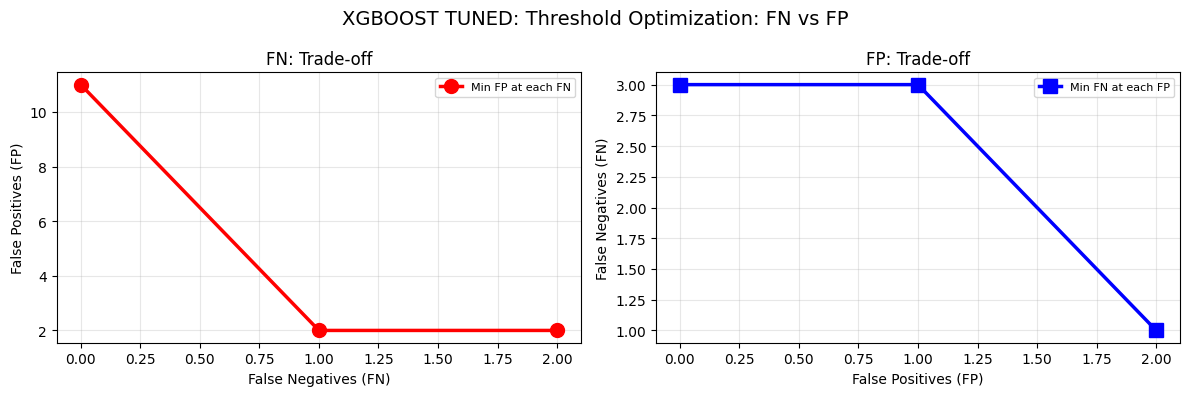

In [382]:
# XGBoost threshold optimization

result = threshold_optimization(best_xgb_tuned,
                                X_test_t,
                                y_test,
                                'xgboost tuned'
)